<a href="https://colab.research.google.com/github/brendanpshea/database_sql/blob/main/Database_02_IntroToSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to SQL: SELECT
### Database and SQL Through Pop Culture | Brendan Shea, PhD
In this chapter, we dive into the heart of SQL and explore some of its most fundamental and powerful features. We start by understanding the basics of the SELECT and FROM statements, which allow us to retrieve data from a table. We then learn how to sort this data using ORDER BY and filter it based on specific conditions using WHERE. The chapter also covers how to handle NULL values, search for patterns using LIKE, and perform calculations across sets of rows using aggregate functions. Throughout, we use the real-world example of a database of sci-fi books to illustrate these concepts in a practical context.

Learning Outcomes: By the end of this chapter, you will be able to:

1.  Retrieve data from a table using SELECT and FROM statements
2.  Sort query results using ORDER BY
3.  Filter data based on specific conditions using WHERE
4.  Handle NULL values in your queries
5.  Search for patterns in data using LIKE
6.  Use aggregate functions to perform calculations across sets of rows
7.  Make your query results more readable using aliases with AS

## Brendan's Lecture

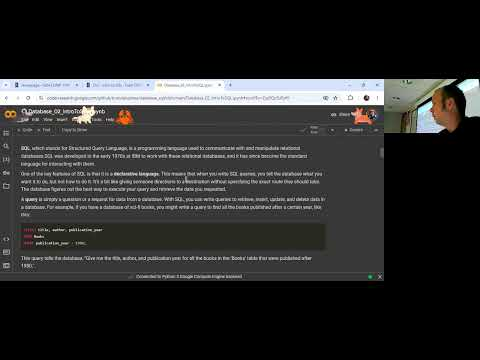

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('dcjw-klyEYA', width=800, height=500)


## Background: The Evolution of Database Systems and the Birth of the Relational Model

Imagine your school's main office in the 1950s. Filing cabinets line the walls, stuffed with folders containing every student's records since the school opened. When a parent calls asking about their child's attendance record, the secretary must walk to the correct cabinet, find the right folder (hopefully it was filed correctly), and flip through papers to locate the information. Now multiply this challenge across every school, hospital, bank, and government office in the world. This was the reality of information management before computers.

The problems with physical filing systems went far beyond just the time it took to find information. Papers could be misfiled or lost. Only one person could access a file at a time. Making copies was laborious. Updating information meant either erasing and rewriting (which could make records messy and hard to read) or creating entirely new documents. Creating summary reports meant manually reviewing and tallying information from many different files.

### Early Computer Databases: Taking Baby Steps

When computers began appearing in businesses during the 1960s, the first attempts at electronic databases essentially copied these physical filing systems. These early systems, which we call **hierarchical databases**, organized information like a family tree. For example, a school's database might have a "root" record for each grade level, connected to "child" records for each class in that grade, which in turn connected to individual student records.

The most famous hierarchical database was IBM's **Information Management System (IMS)**, developed in 1966 for NASA's Apollo program. IMS needed to track the millions of parts required to build the Saturn V rocket and their complex relationships. Each part could contain many smaller parts, forming a natural hierarchy. The system worked well for this specific purpose, but its rigid structure made it difficult to adapt to other types of information.

```
Root: Saturn_V_Rocket
    ├── Stage_1
    │   ├── Engine_1
    │   │   ├── Fuel_Valve
    │   │   ├── Ignition_System
    │   │   └── Nozzle
    │   ├── Engine_2
    │   │   ├── Fuel_Valve
    │   │   ├── Ignition_System
    │   │   └── Nozzle
    │   └── Fuel_Tank
    │       ├── Tank_Wall
    │       └── Fuel_Line
    ├── Stage_2
    │   ├── Engine_1
    │   │   ├── Fuel_Valve
    │   │   ├── Ignition_System
    │   │   └── Nozzle
    │   └── Fuel_Tank
    │       ├── Tank_Wall
    │       └── Fuel_Line
    └── Stage_3
        ├── Engine_1
        │   ├── Fuel_Valve
        │   ├── Ignition_System
        │   └── Nozzle
        └── Fuel_Tank
            ├── Tank_Wall
            └── Fuel_Line

  ```

Around the same time, another approach called the **network database model** emerged. Developed by Charles Bachman and standardized by the Conference on Data Systems Languages (CODASYL) in 1969, network databases allowed more flexible connections between records. Instead of being limited to parent-child relationships, records could connect to multiple other records in any direction. This was more flexible than the hierarchical model, but it came with its own challenges.


```
Record: Saturn_V_Rocket
    - Points to: [Stage_1, Stage_2, Stage_3]

Record: Stage_1
    - Points to: [Engine_1, Engine_2, Fuel_Tank]

Record: Engine_1
    - Points to: [Fuel_Valve, Ignition_System, Nozzle]

Record: Engine_2
    - Points to: [Fuel_Valve, Ignition_System, Nozzle]

Record: Fuel_Tank
    - Points to: [Tank_Wall, Fuel_Line]

Record: Fuel_Line
    - Points to: [Fuel_Valve (Engine_1), Fuel_Valve (Engine_2)]

Record: Fuel_Valve (Engine_1)
    - Points to: [Engine_1]
and so on
````

Both these early approaches shared several significant problems:

1. **Physical Data Dependency**: Programmers needed to understand exactly how data was stored on the computer's disk to write programs that could access it. If the storage method changed, all programs had to be rewritten.

2. **Complex Navigation**: Accessing information meant writing code to navigate through the data structures one step at a time, like following a map. Programmers had to plan out these "paths" through the data carefully.

3. **Inflexible Structure**: Once you set up how data was organized, changing that structure was extremely difficult. Adding new types of relationships between data often meant rebuilding the entire database.

4. **Limited Data Independence**: Changes to how data was stored physically often required changes to the programs that accessed that data, making systems hard to maintain and upgrade.

### The Revolutionary Ideas of Edgar Codd

Enter **Edgar F. Codd**, a mathematician working at IBM's San Jose Research Laboratory. With a background in mathematics and computer science, Codd looked at the database problem differently. Instead of trying to make computers mimic physical filing systems, why not use mathematical principles to create a completely new way of organizing and accessing information?

In 1970, Codd published his groundbreaking paper, "A Relational Model of Data for Large Shared Data Banks." This paper introduced what we now call the **relational model**, and it revolutionized how we think about data organization. The key insights of Codd's model were:

1. **Data in Tables**: All information should be represented in simple tables (which Codd called "relations"). Each table represents a specific type of entity (like students, classes, or teachers), with rows containing individual records and columns representing attributes of those entities.

2. **Mathematical Foundation**: These tables weren't just a convenient way to display data – they were mathematical sets that could be manipulated using set theory operations. This gave the model a rigid theoretical foundation.

3. **Declarative Access**: Instead of navigating through data structures, users should be able to describe what data they want using a high-level language based on predicate logic. The system would figure out how to retrieve the data efficiently.

4. **Physical Data Independence**: Users and programmers shouldn't need to know anything about how data is physically stored to work with it. This separation between the logical view of data and its physical storage was revolutionary.

Let's look at a concrete example of how the relational model works. Imagine a creative writing school with some famous authors as students. Here's how we might organize the information in the relational model:

**Students Table:**

| StudentID | Name | Grade | DateOfBirth |
|-----------|------|-------|-------------|
| 1001 | Virginia Woolf | A | 1882-01-25 |
| 1002 | Ernest Hemingway | B+ | 1899-07-21 |
| 1003 | Maya Angelou | A | 1928-04-04 |
| 1004 | Oscar Wilde | A- | 1854-10-16 |
| 1005 | Emily Dickinson | A | 1830-12-10 |

**Classes Table:**

| ClassID | Subject | Teacher | RoomNumber |
|---------|---------|---------|------------|
| ENG101 | Novel Writing | James Joyce | 221B |
| ENG102 | Poetry | Walt Whitman | 315A |
| ENG203 | Short Stories | Edgar Allan Poe | 451C |
| ENG204 | Literary Theory | Samuel Johnson | 101A |

In the relational model, we can create a third table to show which students are in which classes. This demonstrates how tables can be related to each other:

**Enrollments Table:**

| StudentID | ClassID | EnrollmentDate | Grade |
|-----------|---------|----------------|-------|
| 1001 | ENG101 | 1900-09-01 | A |
| 1001 | ENG102 | 1900-09-01 | A- |
| 1002 | ENG203 | 1900-09-01 | A |
| 1003 | ENG101 | 1900-09-01 | A+ |
| 1004 | ENG204 | 1900-09-01 | B+ |
| 1005 | ENG102 | 1900-09-01 | A |

Notice how the StudentID in the Enrollments table matches with IDs in the Students table, and the ClassID matches with the Classes table. This is how we create relationships between different pieces of information. Through these relationships, we can answer complex questions like "Which students are in Novel Writing class?" or "What classes is Virginia Woolf taking?" without having to navigate through complex hierarchies or networks.

This simple structure, using tables and relationships between them, can represent incredibly complex information in a way that's both efficient for computers and understandable for humans.

### The Impact of the Relational Model

Codd's ideas were so different from existing database systems that many initially dismissed them as impractical. The mathematical concepts seemed too abstract, and critics argued that a system based on these principles could never perform well enough for real-world use.

However, the elegance and power of the relational model gradually won converts. Researchers at IBM and other institutions began working on implementing Codd's ideas, leading to the development of SQL (Structured Query Language) and the first relational database systems in the late 1970s.

The relational model solved many problems that had plagued earlier database systems:

1. **Flexibility**: Adding new types of data or relationships no longer meant rebuilding the entire database.

2. **Data Integrity**: The mathematical foundation made it easier to ensure data remained accurate and consistent.

3. **Easy Queries**: Users could ask complex questions about their data without writing complicated navigation code.

4. **Data Independence**: Changes to how data was stored physically didn't affect programs using the database.

Today, while new types of databases have emerged for specific purposes, the relational model remains the foundation of most major database systems. From small business applications to massive enterprise systems, Codd's ideas continue to influence how we organize and manage data.

### Graphic: Physical Independence

In [ ]:
# @title
%%html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Physical Independence Visualization</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 20px;
        }
        .container {
            display: flex;
            justify-content: space-around;
        }
        .panel {
            border: 1px solid #ccc;
            padding: 20px;
            width: 45%;
        }
        .panel h2 {
            margin-top: 0;
        }
        .data-item {
            margin: 10px 0;
            padding: 10px;
            background-color: #f9f9f9;
            border: 1px solid #ddd;
        }
        .controls {
            margin-top: 20px;
        }
        button {
            padding: 10px 20px;
            font-size: 16px;
            cursor: pointer;
        }
        table {
            width: 100%;
            border-collapse: collapse;
            margin-top: 10px;
        }
        th, td {
            border: 1px solid #ddd;
            padding: 8px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>
    <h1>Physical Independence Visualization</h1>
    <p>This visualization demonstrates how changes to the physical level (e.g., disk, filenames, storage medium, paths) do not affect the logical representation of the data.</p>

    <div class="container">
        <div class="panel">
            <h2>Logical Representation (Books Table)</h2>
            <table id="logical-data">
                <thead>
                    <tr>
                        <th>ID</th>
                        <th>Title</th>
                        <th>Author</th>
                    </tr>
                </thead>
                <tbody>
                    <!-- Rows will be populated by JavaScript -->
                </tbody>
            </table>
        </div>
        <div class="panel">
            <h2>Physical Representation (Storage)</h2>
            <div id="physical-data">
                <div class="data-item"><strong>Disk:</strong> <span id="disk">Disk C:</span></div>
                <div class="data-item"><strong>Filename:</strong> <span id="filename">books.db</span></div>
                <div class="data-item"><strong>Storage Medium:</strong> <span id="storage-medium">SSD</span></div>
                <div class="data-item"><strong>Path:</strong> <span id="path">/data/books.db</span></div>
            </div>
        </div>
    </div>

    <div class="controls">
        <button onclick="changePhysicalLocation()">Change Physical Location</button>
        <button onclick="changeFileName()">Change File Name</button>
        <button onclick="changeStorageMedium()">Change Storage Medium</button>
    </div>

    <script>
        // Sample book data (logical representation as a table/relation)
        const books = [
            { id: 1, title: "The Great Gatsby", author: "F. Scott Fitzgerald" },
            { id: 2, title: "1984", author: "George Orwell" },
            { id: 3, title: "To Kill a Mockingbird", author: "Harper Lee" }
        ];

        // Physical storage details
        let physicalDetails = {
            disk: "Disk C:",
            filename: "books.db",
            storageMedium: "SSD",
            path: "/data/books.db"
        };

        // Function to render logical data as a table
        function renderLogicalData() {
            const tbody = document.querySelector("#logical-data tbody");
            tbody.innerHTML = books.map(book => `
                <tr>
                    <td>${book.id}</td>
                    <td>${book.title}</td>
                    <td>${book.author}</td>
                </tr>
            `).join('');
        }

        // Function to render physical data
        function renderPhysicalData() {
            document.getElementById('disk').textContent = physicalDetails.disk;
            document.getElementById('filename').textContent = physicalDetails.filename;
            document.getElementById('storage-medium').textContent = physicalDetails.storageMedium;
            document.getElementById('path').textContent = physicalDetails.path;
        }

        // Function to change physical location
        function changePhysicalLocation() {
            physicalDetails.disk = physicalDetails.disk === "Disk C:" ? "Disk D:" : "Disk C:";
            physicalDetails.path = physicalDetails.path.replace("C:", physicalDetails.disk);
            renderPhysicalData();
        }

        // Function to change file name
        function changeFileName() {
            physicalDetails.filename = physicalDetails.filename === "books.db" ? "library.db" : "books.db";
            physicalDetails.path = physicalDetails.path.replace("books.db", physicalDetails.filename);
            renderPhysicalData();
        }

        // Function to change storage medium
        function changeStorageMedium() {
            physicalDetails.storageMedium = physicalDetails.storageMedium === "SSD" ? "HDD" : "SSD";
            renderPhysicalData();
        }

        // Initial render
        renderLogicalData();
        renderPhysicalData();
    </script>
</body>
</html>

ID,Title,Author


## Sets and Logic: How SQL Thinks About Data

Imagine you have a big box of baseball cards. Each card has the same information on it - the player's name, team, batting average, and so on. In SQL, this would be like a table, where each card is a row and each piece of information is a column. But SQL doesn't think about these cards one at a time. Instead, it thinks about them as a group, or what mathematicians call a "set."

### What is a Set?

A **set** is just a collection of things where:
- Each thing appears only once (no duplicates)
- The order doesn't matter

For example, these are the same set:
- {apple, banana, orange}
- {banana, orange, apple}
- {orange, apple, banana}

This is exactly how SQL thinks about tables. When you have a Students table, SQL sees it as a set of student records. Each student appears exactly once, and it doesn't matter what order they're in.

Let's look at our creative writing school example:

| StudentID | Name | Grade | DateOfBirth |
|-----------|------|-------|-------------|
| 1001 | Virginia Woolf | A | 1882-01-25 |
| 1002 | Ernest Hemingway | B+ | 1899-07-21 |
| 1003 | Maya Angelou | A | 1928-04-04 |

When we want to find all the A-grade students, we're really asking SQL to create a new set that contains only the students where Grade = 'A'. In mathematical notation, we might write this as:
{student | student is in Students AND student's grade is 'A'}

In SQL, we write:
```sql
SELECT * FROM Students WHERE Grade = 'A';
```

Both mean the same thing: "Give me the set of all students who have an A grade."

### True or False Questions

When SQL looks at data, it asks a lot of true/false questions. These questions are called **logical predicates** - a fancy term for statements that are either true or false. For example:
- "Is this student's grade an A?" (true/false)
- "Is this student older than 20?" (true/false)
- "Is this student taking Poetry class?" (true/false)

When we write a WHERE clause in SQL, we're giving it these true/false questions to ask about each row. SQL checks each row against these questions and keeps only the ones where the answer is "true."

For example, when we write:
```sql
SELECT * FROM Students WHERE Grade = 'A' AND StudentID > 1001;
```

SQL asks two questions about each student:
1. "Is their grade an A?"
2. "Is their ID greater than 1001?"

Only students where both answers are "true" make it into our final set.

### Describing What You Want, Not How to Get It

One of the most interesting things about SQL is that you just describe what you want, not how to get it. This is called **declarative programming**, and it's very different from how most programming works.

Think about the difference between these two ways of giving directions:
1. "Go straight for two blocks, turn right at the library, go one more block"
2. "Find the coffee shop on Oak Street"

The first way gives step-by-step instructions. The second way just describes what you want. SQL works like the second way - you tell it what data you want, and it figures out how to get it.

For example, if we want to find all A-grade students in Novel Writing class, in a regular programming language we might write:

```python
a_grade_students = []
for each student in all_students:
    if student.grade == 'A':
        for each enrollment in all_enrollments:
            if enrollment.studentID == student.studentID:
                if enrollment.classID == 'ENG101':
                    a_grade_students.append(student)
```

But in SQL, we just describe what we want:
```sql
SELECT Name
FROM Students
WHERE Grade = 'A'
  AND StudentID IN (
    SELECT StudentID
    FROM Enrollments
    WHERE ClassID = 'ENG101'
  );
```

We're telling SQL "I want the names of students who have an A grade and are in Novel Writing class" - what we want, not how to find it.

### Putting Things Together

When we work with multiple tables in SQL, we're really working with multiple sets. Going back to our creative writing school, we have:

- A set of students
- A set of classes
- A set of enrollments (showing which students are in which classes)

When we join these tables together, we're creating new sets based on how these original sets relate to each other. For example, when we want to see all students and their classes:

```sql
SELECT Students.Name, Classes.Subject
FROM Students
JOIN Enrollments ON Students.StudentID = Enrollments.StudentID
JOIN Classes ON Enrollments.ClassID = Classes.ClassID;
```

This creates a new set where each element contains information from both sets - like taking two separate puzzle pieces and connecting them where they fit together.

By thinking about data in terms of sets and logical statements, SQL gives us a powerful way to work with information. We don't have to worry about the details of how to find and combine data - we just have to describe the set of data we want, and SQL figures out the rest.

## The Four Basic Database Operations: CRUD

At its heart, nearly everything we do with a database falls into one of four basic operations, known as **CRUD**:

| Operation | What It Does | Basic SQL Command |
|-----------|-------------|-------------------|
| Create | Add new information | INSERT INTO table_name |
| Read | Look up or retrieve information | SELECT from table_name |
| Update | Change existing information | UPDATE table_name |
| Delete | Remove information | DELETE FROM table_name |

These four operations form the foundation of database interaction. Think about how you might manage a library catalog: you need to add new books (Create), look up books (Read), update information about books (Update), and remove books that are no longer in the collection (Delete). These same basic operations apply whether you're managing a small personal database or a massive corporate system.

The CRUD operations are so fundamental that they appear in almost every database system, not just SQL. When you use an app on your phone that saves information, it's using these same basic operations behind the scenes. Understanding CRUD helps you see the patterns in how all databases work.

## The Five Parts of SQL

SQL is organized into five sub-languages, each designed for specific types of database tasks. Think of these as specialized toolkits, each perfect for certain kinds of jobs.

### 1. Data Definition Language (DDL)
DDL is for creating and modifying the structure of your database - like being an architect who designs buildings:

| Command | Purpose | Example Use |
|---------|---------|-------------|
| CREATE | Make new tables or databases | Create a new Students table |
| ALTER | Modify existing tables | Add an Email column to Students |
| DROP | Remove tables or databases | Remove an old Courses table |
| TRUNCATE | Empty a table but keep its structure | Clear all data from Grades |

DDL commands are powerful because they affect the fundamental structure of your database. When you use DDL, you're making decisions that will shape how data can be stored and accessed. For example, when you CREATE a table, you're not just making a place to store data - you're defining what kinds of data can be stored, how they relate to each other, and what rules they must follow.

The effects of DDL commands are usually permanent, so they're typically used less frequently than other SQL commands. You might use DDL commands heavily when first setting up a database or during major updates, but they're not part of day-to-day database operations.

### 2. Data Manipulation Language (DML)
DML is for working with the actual data in your tables - like being a librarian who manages books:

| Command | Purpose | Example Use |
|---------|---------|-------------|
| INSERT | Add new data | Add a new student |
| UPDATE | Modify existing data | Change a student's grade |
| DELETE | Remove data | Remove a dropped student |
| MERGE | Combine data from multiple sources | Update grades from a spreadsheet |

These are the commands you'll use most often in day-to-day database work. DML lets you work with individual records or groups of records, adding, changing, or removing data as needed. Unlike DDL commands that affect the structure of tables, DML commands work with the data inside the tables.

One important aspect of DML is that its effects can usually be undone (using TCL commands, which we'll discuss later). This makes DML safer to use for routine operations, as mistakes can be corrected.

### 3. Data Query Language (DQL)
DQL focuses on searching and retrieving data - like being a detective who gathers information:

| Clause | Purpose | Example Use |
|--------|---------|-------------|
| SELECT | Choose which columns to see | Get student names and grades |
| FROM | Specify which tables to use | Look in the Students table |
| WHERE | Filter the results | Find all 'A' grade students |
| ORDER BY | Sort the results | Sort students by last name |
| GROUP BY | Organize data into groups | Group students by grade level |

While technically part of DML, the SELECT command and its clauses are so important and frequently used that they're often considered their own category. DQL is what makes databases truly useful - it lets us find exactly the information we need, when we need it.

The real power of DQL comes from combining these clauses. For example, you might want to find all students with an 'A' grade (WHERE) in a particular class (FROM), see only their names and email addresses (SELECT), and have the results sorted alphabetically (ORDER BY). DQL lets you build these complex queries by combining simple components.

### 4. Data Control Language (DCL)
DCL manages security and access permissions - like being a security guard:

| Command | Purpose | Example Use |
|---------|---------|-------------|
| GRANT | Give permissions | Allow teachers to view grades |
| REVOKE | Remove permissions | Remove access for former staff |

In any database used by multiple people, it's crucial to control who can do what. DCL lets you specify exactly what actions each user can perform. For example, teachers might need to view and update grades, while administrative staff might need to add or remove students, and students themselves might only be allowed to view their own records.

These permissions can be very specific - you can control not just who can access the database, but exactly what tables they can access and what operations they can perform on those tables.

### 5. Transaction Control Language (TCL)
TCL ensures that database changes are processed reliably - like being an accountant who keeps accurate records:

| Command | Purpose | Example Use |
|---------|---------|-------------|
| BEGIN | Start a group of changes | Start updating grades |
| COMMIT | Save all changes | Save all grade updates |
| ROLLBACK | Undo changes | Cancel incorrect updates |

TCL is crucial for maintaining database integrity. A transaction is a group of related changes that should either all succeed together or all fail together. For example, when transferring money between bank accounts, you need to both subtract from one account and add to another - these operations must happen together or not at all.

TCL commands let you group related changes together and ensure they're processed reliably, even if problems occur (like network failures or system crashes). This makes databases much more reliable for important operations.

These five components of SQL work together to provide a complete system for managing data. Just as a school needs architects to design the building, teachers to manage classes, administrators to keep records, and security guards to maintain safety, a database needs all these different types of commands to function effectively. Understanding how these parts work together helps you use SQL more effectively and appreciate its elegant design.

## SQL Standards and Varieties: How One Language Became Many

SQL started life at IBM in the 1970s, where it was originally called SEQUEL (Structured English Query Language). When other companies became interested in using similar database systems, it became clear that everyone needed to speak the same language. Without standardization, each company's version of SQL would be different, making it extremely difficult for:
- Programmers to work with different databases
- Companies to switch from one database system to another
- Software to work with multiple types of databases
- Students to learn database skills that would work anywhere

In 1986, the **American National Standards Institute (ANSI)** created the first official SQL standard. This was later adopted by the **International Organization for Standardization (ISO)**, making SQL an international standard. The standard has been updated several times since then, with major revisions in 1989, 1992, 1999, 2003, 2006, 2008, and 2011. Each new version adds new features and capabilities while maintaining compatibility with older versions.

### SQL Flavors: Why They Exist

Despite having a standard, different database systems still have their own "flavors" of SQL. This might seem to defeat the purpose of having a standard, but there's a good reason for it. Think of the SQL standard like the rules of chess - everyone agrees on how the pieces move and what constitutes a legal move. However, chess sets can come in many different styles and materials, and tournaments might have additional rules about time limits or conduct.

Similarly, while all major SQL databases follow the standard for core features, they often add their own extensions and special features. Here are some of the most common varieties:

#### SQLite
SQLite is like a Swiss Army knife - small, self-contained, and incredibly versatile. Some key characteristics:
- The entire database is stored in a single file
- No separate server process needed
- Perfect for smaller applications and mobile devices
- Built into many operating systems and browsers
- Great for learning because it's simple to set up and use

This is why we'll be using SQLite in the first part of this course - it lets us focus on learning SQL itself without getting bogged down in database setup and configuration.

#### PostgreSQL
PostgreSQL (often called "Postgres") is like a high-end professional kitchen - it has everything you need for serious work, including many advanced features. Key features include:
- Excellent compliance with SQL standards
- Support for complex queries and data types
- Advanced features for large-scale applications
- Strong data integrity guarantees
- Open-source and community-driven

We'll use Postgres later in this course when we're ready to work with more advanced database features.

#### Other Common Varieties
- **MySQL**: Very popular for web applications, especially with PHP
- **Oracle**: Often used in large enterprises, known for reliability
- **SQL Server**: Microsoft's database system, well-integrated with Windows
- **MariaDB**: An open-source fork of MySQL, growing in popularity

### How Different Are These Varieties?

The good news is that the core SQL commands work basically the same way in all these systems. If you write:
```sql
SELECT name FROM students WHERE grade = 'A';
```
This will work the same way in SQLite, Postgres, MySQL, or any other SQL database. It's like how you can drive any car once you know how to drive - the basic controls (steering wheel, pedals, etc.) work the same way even if they look a bit different.

The differences usually show up in:
- Advanced features
- Performance optimization options
- Administrative commands
- Data type support
- Built-in functions

This is why we start with SQLite - it lets us learn the core concepts that work everywhere, without getting distracted by system-specific features. Once you understand these fundamentals, learning the specific features of other SQL varieties becomes much easier.

## Getting Started With SQLite in Google Colab
Google Colab is a free, cloud-based Jupyter notebook environment that allows you to write and execute Python code in your browser. It's a great platform for learning and experimenting with SQL and SQLite, as it provides a simple, interactive way to run SQL queries and visualize the results.

To get started with SQLite in Google Colab, we'll use the IPython SQL magic extension. This extension allows us to write SQL queries directly in our notebook cells, prefixed with the `%%sql` magic command.
First, if needed, let's install the IPython SQL extension and load it into our notebook:

In [ ]:
# !pip install ipython-sql # Not needed--already installed
!pip install prettytable==0.7.2 --force-reinstall -q
%reload_ext sql

  Preparing metadata (setup.py) ... done


Now that we have the SQL magic extension loaded, we can connect to our SQLite database. In this case, we'll be using a pre-populated database file called `books.db`, which contains data about a collection of sci-fi books.

To load the `books.db` file into our Colab notebook, we can use the `wget` command to download it from a web link:

In [ ]:
!wget -N 'https://github.com/brendanpshea/database_sql/raw/main/data/sci_fi_books.db' -q

Once the file is downloaded, we can connect to it using the SQL magic extension:

In [ ]:
%config SqlMagic.autopandas=True
%sql sqlite:///sci_fi_books.db

This command establishes a connection to the `sci_fi_books.db` SQLite database file in our current working directory.

With the connection established, we can now run SQL queries on our database directly in our Colab notebook cells. For example, to see a list of all the tables in our database, we can use the following command.



In [ ]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///sci_fi_books.db
Done.


,name
0,books


## Getting to Know the Books Table

The data we'll be working with throughout this book comes from Goodreads, a popular social cataloging website that allows users to search its database of books, annotations, and reviews. Users can sign up and register books to generate library catalogs and reading lists. They can also create their own groups of book suggestions, surveys, polls, blogs, and discussions.

For our purposes, we'll be using a dataset that contains information about a collection of science fiction books. This data has been extracted from Goodreads and formatted to fit into a SQLite database, allowing us to easily explore and analyze it using SQL.

To work effectively with a database, it's crucial to understand its structure or schema. A database **schema** is a blueprint that defines how the data is organized. It specifies what tables exist in the database, what columns each table has, and what type of data each column can store.

Here's a breakdown of the schema for our "Books" table:

-   `id`: A unique identifier for each book, serving as the PRIMARY KEY for our database. This ensures that each record in the table can be uniquely identified and accessed.
-   `title`: The title of the book, stored as a TEXT data type.
-   `series`: If the book is part of a series, this column will contain the name of that series. It's also stored as TEXT.
-   `author`: The author of the book, stored as TEXT.
-   `rating`: The average rating of the book on Goodreads, stored as a REAL number (a decimal number).
-   `language`: The language the book is written in, stored as TEXT.
-   `pages`: The number of pages in the book, stored as an INT (integer).
-   `publisher`: The name of the book's publisher, stored as TEXT.
-   `numRatings`: The total number of ratings the book has received on Goodreads, stored as an INT.
-   `firstPublishDate`: The date when the book was first published, stored as TEXT.
-   `publishDate`: The most recent publication date of the book, also stored as TEXT.

Understanding this schema is essential for writing effective SQL queries. It tells us what information we have access to and how it's structured. For example, knowing that the `rating` is stored as a REAL number tells us that we can perform mathematical operations on it, like finding the average rating across all books. Knowing that `pages` is an INT tells us that we can use it for numerical comparisons, like finding all books over 500 pages.

##  SELECT and FROM

Now that we understand the structure of our database, let's dive into the fundamental building blocks of SQL queries: SELECT and FROM.

The SELECT statement is used to retrieve data from one or more tables in a database. Its basic syntax is as follows:

```sql
SELECT column1, column2, ...
FROM table_name;
```

Here's what each part of this statement means:

-   `SELECT`: This keyword initiates the query and indicates that we're about to specify which columns we want to retrieve.
-   `column1, column2, ...`: These are the names of the columns we want to include in our result set. You can list as many columns as you want, separated by commas. If you want to select all columns, you can use an asterisk (`*`) instead.
-   `FROM`: This keyword indicates that we're about to specify which table we want to retrieve data from.
-   `table_name`: This is the name of the table we're querying.

So, in plain English, this statement tells the database: "Give me the specified columns from this table."

Let's look at some examples of SELECT queries using our "Books" table.

### Selecting all columns

To select all columns from the "Books" table, we can use the asterisk (`*`) shorthand:

In [ ]:
%%sql
SELECT * -- Select all columns
FROM Books -- From the Books table

 * sqlite:///sci_fi_books.db
Done.


,firstPublishDate,publishDate,title,series,author,rating,language,pages,publisher,numRatings,id
0,None,2008-09-14,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,English,374.0,Scholastic Press,6376780,1
1,2003-06-21,2004-09-28,Harry Potter and the Order of the Phoenix,Harry Potter #5,J.K. Rowling,4.50,English,870.0,Scholastic Inc.,2507623,2
2,1945-08-17,1996-04-28,Animal Farm,None,George Orwell,3.95,English,141.0,Signet Classics,2740713,3
3,1956-10-28,2002-09-16,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #...,C.S. Lewis,4.26,English,767.0,HarperCollins,517740,4
4,1955-10-20,2012-09-25,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,The Lord of the Rings #0-3,J.R.R. Tolkien,4.60,English,1728.0,Ballantine Books,110146,5
...,...,...,...,...,...,...,...,...,...,...,...
6586,None,1998-04-02,To Hold Infinity,None,John Meaney,3.73,English,560.0,Bantam,141,6599
6587,None,2015-10-01,The Natural Way of Things,None,Charlotte Wood,3.53,English,320.0,Allen & Unwin,10894,6600
6588,None,1983-01-01,Arafel's Saga,Arafel #1-2,C.J. Cherryh,3.69,English,408.0,"Nelson Doubleday, Inc.",1070,6601
6589,None,2017-01-12,Nameless Fate,Fated Mate #1,Stephanie West,3.93,English,445.0,None,508,6602


### Selecting specific columns
If we only want to retrieve certain columns, we can list them explicitly after the SELECT keyword:

In [ ]:
%%sql
SELECT
  title, -- Select the title column
  author, -- Select the author column
  publishDate-- Select the publishDate column
FROM Books -- From the Books table
LIMIT 10; -- Limit the result to the first 10 rows

 * sqlite:///sci_fi_books.db
Done.


,title,author,publishDate
0,The Hunger Games,Suzanne Collins,2008-09-14
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,2004-09-28
2,Animal Farm,George Orwell,1996-04-28
3,The Chronicles of Narnia,C.S. Lewis,2002-09-16
4,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,2012-09-25
5,The Hitchhiker's Guide to the Galaxy,Douglas Adams,2007-06-23
6,Fahrenheit 451,Ray Bradbury,2011-11-29
7,Divergent,Veronica Roth,2012-02-28
8,Ender's Game,Orson Scott Card,2004-09-30
9,Harry Potter and the Sorcerer's Stone,J.K. Rowling,2003-11-01


###  Selecting DISTINCT values
Sometimes, you might want to retrieve only the unique values from a column. You can do this using the DISTINCT keyword:

In [ ]:
%%sql
SELECT DISTINCT author -- Select distinct values from the author column
FROM Books -- From the Books table
LIMIT 10; -- Limit the result to the first 10 distinct authors

 * sqlite:///sci_fi_books.db
Done.


,author
0,Suzanne Collins
1,J.K. Rowling
2,George Orwell
3,C.S. Lewis
4,J.R.R. Tolkien
5,Douglas Adams
6,Ray Bradbury
7,Veronica Roth
8,Orson Scott Card
9,Audrey Niffenegger


You can see the difference this makes if you try the same query WITHOUT using distinct.

In [ ]:
%%sql
SELECT author -- Select all values from the author column
FROM Books -- From the Books table
LIMIT 15; -- Limit the result to the first 15 rows

 * sqlite:///sci_fi_books.db
Done.


,author
0,Suzanne Collins
1,J.K. Rowling
2,George Orwell
3,C.S. Lewis
4,J.R.R. Tolkien
5,Douglas Adams
6,Ray Bradbury
7,Veronica Roth
8,Orson Scott Card
9,J.K. Rowling


You'll notice that some names (such as JK Rowling) appear twice. Sometimes, you'll want this (for example, if you are trying to count the number of books she wrote). Other times, though, you'll want to use DISTINCT to get rid of these "duplicates."

## ORDER BY
The ORDER BY clause is used to sort the results of a SQL query based on one or more columns. Its basic syntax is as follows:

```sql
SELECT
  column1,
  column2,
  ...
FROM
  table_name
ORDER BY
  column1 [ASC|DESC],
  column2 [ASC|DESC],
  ...;
```

Here's what each part of this statement means:

-   `SELECT` and `FROM` are used as before to specify the columns to retrieve and the table to retrieve them from.
-   `ORDER BY` is followed by the column(s) you want to use for sorting the results.
-   For each column, you can optionally specify `ASC` for ascending order (smallest to largest, or A to Z) or `DESC` for descending order (largest to smallest, or Z to A). If not specified, `ASC` is used by default.
-   If multiple columns are specified, the results are sorted by the first column, then by the second column within each value of the first column, and so on.

Now, let's look at a simple example:


In [ ]:
%%sql
SELECT
  title, -- Select the title column
  author, -- Select the author column
  rating -- Select the rating column
FROM Books -- From the Books table
ORDER BY rating -- Sort the results by rating in ascending order
LIMIT 10;

 * sqlite:///sci_fi_books.db
Done.


,title,author,rating
0,Revealing Eden,Victoria Foyt,1.99
1,Skull Flowers,Jazon Dion Fletcher,2.48
2,Ù…ÙˆØ³Ù… ØµÙŠØ¯ Ø§Ù„ØºØ²Ù„Ø§Ù†,Ø£Ø­Ù…Ø¯ Ù…Ø±Ø§Ø¯,2.74
3,Blueprint: Blaupause,Charlotte Kerner,2.78
4,Lost,Gregory Maguire,2.82
5,Redemption Prep,Samuel Miller,2.82
6,Alpha Centauri,William Barton,2.87
7,Corvus,L. Lee Lowe,2.90
8,Buck Rogers in the 25th Century: The Western P...,Paul S. Newman,2.91
9,L'an 2440,Louis-SÃ©bastien Mercier,2.92


We can also do this in descending order (with the highest ratings first)

In [ ]:
%%sql
SELECT
  title, -- Select the title column
  author, -- Select the author column
  rating -- Select the rating column
FROM Books -- From the Books table
ORDER BY rating DESC -- Sort the results by rating in descending order
LIMIT 10;

 * sqlite:///sci_fi_books.db
Done.


,title,author,rating
0,"Kiss Me, I'm Irish",John Blandly,5.00
1,The Present,Kenneth Thomas,4.92
2,Maya of the Inbetween,Sita Bennett,4.86
3,Predestination: The Future is History,S. W. Cotton,4.85
4,The Beachhead,David Anderson,4.84
5,Assault On Utopia: Part 1,Steven P Sharp,4.80
6,Insectland,Neil D. Ostroff,4.80
7,"The Way of Kings, Part 2",Brandon Sanderson,4.79
8,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",J.K. Rowling,4.78
9,Words of Radiance,Brandon Sanderson,4.75


Finally, we can order by multiple columns (for example, by author and rating).

##  WHERE

The WHERE clause in SQL is used to filter the results of a query based on a specified condition. It allows you to retrieve only the rows that satisfy a particular criterion, making it a powerful tool for narrowing down your query results to only the data you're interested in.

The basic syntax of a SQL query with a WHERE clause is as follows:

```sql
SELECT
  column1,
  column2,
  ...
FROM
  table_name
WHERE
  condition;
```

Here's what each part of this statement means:

-   `SELECT` and `FROM` are used as before to specify the columns to retrieve and the table to retrieve them from.
-   `WHERE` is followed by a condition that each row must satisfy to be included in the result set.
-   The condition is usually a comparison between a column value and a constant, or between two column values.


Let's look at an example. Let's find all books in our "Books" table with a rating higher than 4.5:


In [ ]:
%%sql
SELECT
  title, -- Select the title column
  author, -- Select the author column
  rating -- Select the rating column
FROM Books -- From the Books table
WHERE rating > 4.5 -- Filter the results to only include books with a rating higher than 4.5
LIMIT 10;

 * sqlite:///sci_fi_books.db
Done.


,title,author,rating
0,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.60
1,Harry Potter and the Deathly Hallows,J.K. Rowling,4.62
2,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,4.57
3,Harry Potter and the Goblet of Fire,J.K. Rowling,4.56
4,Harry Potter and the Half-Blood Prince,J.K. Rowling,4.57
5,The Name of the Wind,Patrick Rothfuss,4.53
6,A Storm of Swords,George R.R. Martin,4.53
7,The Wise Man's Fear,Patrick Rothfuss,4.56
8,The Way of Kings,Brandon Sanderson,4.63
9,Harry Potter Series Box Set,J.K. Rowling,4.73


The condition in the WHERE clause can use various comparison operators:

-   `=` for equality
-   `<>` or `!=` for inequality
-   `<` for less than
-   `>` for greater than
-   `<=` for less than or equal to
-   `>=` for greater than or equal to

You can also combine multiple conditions using logical operators:

-   `AND`: Both conditions must be true.
-   `OR`: At least one condition must be true.
-   `NOT`: The condition must not be true.

For example, to find all books with more than 500 pages and more than 10,000 ratings:

In [ ]:
%%sql
SELECT
  title,
  author,
  pages,
  numRatings
FROM
  Books
WHERE
  -- Long books that have many ratings
  pages > 500 AND numRatings > 10000
LIMIT 10;

 * sqlite:///sci_fi_books.db
Done.


,title,author,pages,numRatings
0,Harry Potter and the Order of the Phoenix,J.K. Rowling,870,2507623
1,The Chronicles of Narnia,C.S. Lewis,767,517740
2,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,1728,110146
3,A Game of Thrones,George R.R. Martin,835,2003043
4,Dune,Frank Herbert,661,765785
5,The Stand,Stephen King,1153,616021
6,Harry Potter and the Deathly Hallows,J.K. Rowling,759,2811637
7,The Fellowship of the Ring,J.R.R. Tolkien,527,2355237
8,Atlas Shrugged,Ayn Rand,1168,353814
9,Harry Potter and the Goblet of Fire,J.K. Rowling,734,2594622


### Graphic: Structure of a SQL Query

In [ ]:
# @title
mm("""
graph TD
    A[SQL Query] --> B[SELECT]
    A --> C[FROM]
    A --> D[WHERE]
    B -->|Specifies| E[Columns to retrieve]
    C -->|Identifies| F[Table or tables]
    D -->|Filters| G[Rows based on conditions]
    E --> H[Result Set]
    F --> H
    G --> H
""")

## SQLite Syntax Rules
Before continuing our study of SQL, it's worth taking a moment to review some basic syntax rules. As we've been discussing, a basic SQLite query follows this structure:

```sql
SELECT column1, column2
FROM table_name
WHERE condition;
```

### Key Syntax Rules

#### 1. Semicolons (;)
- End each SQL statement with a semicolon.
- This tells SQLite that the statement is complete.

Example:
```sql
SELECT * FROM users;
```

#### 2. Capitalization
- SQLite is not case-sensitive for keywords (SELECT, FROM, WHERE, etc.).
- However, it's a good practice to capitalize keywords for readability.
- Table and column names are case-sensitive if they're in double quotes, otherwise they're not.

Example:
```sql
select * from Users;  -- This works
SELECT * FROM users;  -- This also works
SELECT * FROM "Users";  -- This is case-sensitive
```

#### 3. Line Breaks
- You can write your query on a single line or split it across multiple lines for better readability.
- SQLite ignores extra whitespace.

Example:
```sql
SELECT name, age FROM users WHERE age > 18;

-- This is equivalent to:
SELECT name, age
FROM users
WHERE age > 18;
```

#### 4. Single vs Double Quotes
- Use single quotes ('') for string literals (text values).
- Use double quotes ("") for table or column names if they contain spaces or are case-sensitive.

Example:
```sql
SELECT * FROM users WHERE name = 'Sam Q';
SELECT * FROM "User Table" WHERE "First Name" = 'Sam Q';
```

#### 5. Comments
- Use `--` for single-line comments.
- Use `/* */` for multi-line comments.

Example:
```sql
-- This is a single-line comment
SELECT * FROM users; /* This is a
multi-line comment */
```

## Handling NULL Values

In SQL, NULL is a special value that represents a missing or unknown value. It's important to understand how to handle NULLs in your queries, as they can sometimes lead to unexpected results.

In our "Books" table, both the "series" and "firstPublishDate" columns have some NULL values. This means that for some books, the series information or the original publication date is not known or not applicable.

When filtering data using the WHERE clause, you need to use special operators to check for NULL values:

-   `IS NULL`: Checks if a value is NULL.
-   `IS NOT NULL`: Checks if a value is not NULL.

For example, to find all books that are part of a series (i.e., the "series" column is not NULL):

In [ ]:
%%sql
SELECT
  title,
  author,
  series
FROM
  Books
WHERE
  -- books that ARE part of a series
  series IS NOT NULL
LIMIT 10;

 * sqlite:///sci_fi_books.db
Done.


,title,author,series
0,The Hunger Games,Suzanne Collins,The Hunger Games #1
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,Harry Potter #5
2,The Chronicles of Narnia,C.S. Lewis,The Chronicles of Narnia (Publication Order) #...
3,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,The Lord of the Rings #0-3
4,The Hitchhiker's Guide to the Galaxy,Douglas Adams,The Hitchhiker's Guide to the Galaxy #1
5,Divergent,Veronica Roth,Divergent #1
6,Ender's Game,Orson Scott Card,Ender's Saga #1
7,Harry Potter and the Sorcerer's Stone,J.K. Rowling,Harry Potter #1
8,A Wrinkle in Time,Madeleine L'Engle,Time Quintet #1
9,A Game of Thrones,George R.R. Martin,A Song of Ice and Fire #1


Similarly, to find all books where the original publication date is unknown:

In [ ]:
%%sql
SELECT
  title,
  author,
  firstPublishDate
FROM
  Books
WHERE
  -- books where the original publication date is unknown
  firstPublishDate IS NULL
LIMIT 10;

 * sqlite:///sci_fi_books.db
Done.


,title,author,firstPublishDate
0,The Hunger Games,Suzanne Collins,None
1,Harry Potter and the Deathly Hallows,J.K. Rowling,None
2,Insurgent,Veronica Roth,None
3,The Maze Runner,James Dashner,None
4,The Selection,Kiera Cass,None
5,Catching Fire,Suzanne Collins,None
6,Uglies,Scott Westerfeld,None
7,Cinder,Marissa Meyer,None
8,The Wise Man's Fear,Patrick Rothfuss,None
9,Ready Player One,Ernest Cline,None


It's important to note that you cannot use the equality operator (=) to check for NULLs. For example, the following query will not return any results:

In [ ]:
%%sql
SELECT
  title,
  author,
  firstPublishDate
FROM
  Books
WHERE
  firstPublishDate = NULL; -- This will not work as expected!

 * sqlite:///sci_fi_books.db
Done.


""


This is because in SQL, any comparison with NULL (even `NULL = NULL`) evaluates to NULL, which is treated as false in the context of a WHERE clause.

##  LIKE

The LIKE operator in SQL is used to search for a specified pattern in a column. It is often used in conjunction with the WHERE clause to filter rows based on a partial match rather than an exact match.

The basic syntax of using LIKE in a WHERE clause is as follows:

```sql
SELECT
  column1,
  column2,
  ...
FROM
  table_name
WHERE
  column LIKE pattern;
```

Here:

-   `column` is the name of the column you want to search.
-   `pattern` is the pattern you want to match. It can include wildcards:
    -   `%` matches any sequence of zero or more characters.
    -   `_` matches any single character.

For example:
- `title LIKE 'a%'` matches any title beginning with 'a' (case-insenstive).
- `title LIKE '%a'` matches any title ending with 'a' (case-insenstive).
- `title LIKE '%a%'` matches any title with an 'a' (case-insenstive) anywhere in the title.
- `title LIKE '_a'` matches any title with an 'a' as the second character (case-insenstive).

Let's look at some examples using our "Books" table.

### Example: Book titles starting with 'The'
To find all books whose title starts with "The":

In [ ]:
%%sql
SELECT
  title,
  author
FROM
  Books
WHERE
  -- books whose title starts with "The"
  title LIKE 'The%'
LIMIT 10;

 * sqlite:///sci_fi_books.db
Done.


,title,author
0,The Hunger Games,Suzanne Collins
1,The Chronicles of Narnia,C.S. Lewis
2,The Hitchhiker's Guide to the Galaxy,Douglas Adams
3,The Time Traveler's Wife,Audrey Niffenegger
4,The Princess Bride,William Goldman
5,The Handmaid's Tale,Margaret Atwood
6,The Giver,Lois Lowry
7,The Stand,Stephen King
8,The Fellowship of the Ring,J.R.R. Tolkien
9,The Road,Cormac McCarthy


### Example: Author Names Containing `Lewis`
Now, let's look for author names that contain "lewis" anywhere.

In [ ]:
%%sql
SELECT
  title,
  author
FROM
  Books
WHERE
  -- author names that contain "lewis" anywhere
  author LIKE '%lewis%'
LIMIT 10;

 * sqlite:///sci_fi_books.db
Done.


,title,author
0,The Chronicles of Narnia,C.S. Lewis
1,The Voyage of the Dawn Treader,C.S. Lewis
2,The Last Battle,C.S. Lewis
3,The Silver Chair,C.S. Lewis
4,Prince Caspian,C.S. Lewis
5,Perelandra,C.S. Lewis
6,That Hideous Strength,C.S. Lewis
7,Space Trilogy: Out of the Silent Planet / Pere...,C.S. Lewis
8,Out of the Silent Planet,C.S. Lewis
9,It Can't Happen Here,Sinclair Lewis


## Aggregate Functions and Aliasing with AS

Aggregate functions are powerful tools in SQL that allow you to perform calculations on sets of rows. They operate on a set of values and return a single result. Some common aggregate functions are:

-   COUNT(): Counts the number of rows that match the specified criteria.
-   SUM(): Calculates the sum of a set of values.
-   AVG(): Calculates the average of a set of values.
-   MAX(): Returns the largest value in a set of values.
-   MIN(): Returns the smallest value in a set of values.

### Examples of Aggregate Functions

Let's look at some examples using our "Books" table.

In [ ]:
%%sql
--Find total number of books
SELECT
  COUNT(*) AS total_books
FROM
  Books;

 * sqlite:///sci_fi_books.db
Done.


,total_books
0,6591


In [ ]:
%%sql
--Average ratings of books
SELECT
  AVG(rating) AS avg_rating
FROM
  Books;

 * sqlite:///sci_fi_books.db
Done.


,avg_rating
0,3.988885


In [ ]:
%%sql
--Total number of pages across all books
SELECT
  SUM(pages) AS total_pages
FROM
  Books;

 * sqlite:///sci_fi_books.db
Done.


,total_pages
0,2495231


In [ ]:
%%sql
--Find maximum and minimum rating
SELECT
  MAX(rating) AS max_rating,
  MIN(rating) AS min_rating
FROM
  Books;

 * sqlite:///sci_fi_books.db
Done.


,max_rating,min_rating
0,5.0,1.99


### Combining Aggregate Functions with WHERE Clauses
We can also combine aggregate functions with WHERE clauses to calculate values based on certain conditions.

In [ ]:
%%sql
--Find the average rating of books after 2000
SELECT
  AVG(rating) AS avg_rating_after_2000
FROM
  Books
WHERE
  publishDate > 2000;

 * sqlite:///sci_fi_books.db
Done.


,avg_rating_after_2000
0,3.994752


In [ ]:
%%sql
--Find the number of books with more than 500 pages
SELECT
  COUNT(*) AS books_over_500_pages
FROM
  Books
WHERE
  pages > 500;

 * sqlite:///sci_fi_books.db
Done.


,books_over_500_pages
0,1108


In [ ]:
%%sql
--Find the maximum rating of books with more than 10,000 ratings
SELECT
  MAX(rating) AS max_rating_over_10000
FROM
  Books
WHERE
  numRatings >= 10000;

 * sqlite:///sci_fi_books.db
Done.


,max_rating_over_10000
0,4.79


### Aliasing with AS
The `AS` keyword is used to give a column or an expression a temporary name (an **alias**) in the result set. This can make the result set more readable.

In the previous examples, we used AS to give descriptive names to the results of the aggregate functions, like "total_books", "avg_rating", "max_rating", etc. This makes the output easier to understand at a glance.

Aggregate functions are essential for summarizing and analyzing data in SQL. They allow you to quickly calculate totals, averages, maximums, minimums, and other summary statistics across entire sets of rows or based on specific conditions. Combined with the aliasing capabilities of the AS keyword, they provide a powerful way to extract insights from your data.


## Basic Math Operations and Functions in SQL

SQL supports various mathematical operations and functions that allow you to perform calculations on numeric data directly within your queries. These can be used in the SELECT clause, the WHERE clause, or in combination with aggregate functions.

The basic arithmetic operators in SQL are:

-   Addition: `+`
-   Subtraction: `-`
-   Multiplication: `*`
-   Division: `/`
-   Modulo (remainder): `%`

For example, let's say we want to calculate the price after a 10% discount for a book that costs $20:

In [ ]:
%%sql
SELECT
  20 - (20 * 0.1) AS discounted_price;

 * sqlite:///sci_fi_books.db
Done.


,discounted_price
0,18.0


SQL also provides a set of built-in mathematical functions. Some commonly used ones are:

-   `ROUND(number, decimal_places)`: Rounds a number to a specified number of decimal places.
-   `FLOOR(number)`: Returns the largest integer value that is less than or equal to the number.
-   `CEIL(number)` or `CEILING(number)`: Returns the smallest integer value that is greater than or equal to the number.
-   `ABS(number)`: Returns the absolute value of the number.
-   `SQRT(number)`: Returns the square root of the number.
-   `POWER(number, power)`: Returns the result of raising the number to the specified power.

Let's look at an example using `ROUND()`. Say we want to see the average rating of each book rounded to 1 decimal place:

In [ ]:
%%sql
--Get rounded rating
SELECT
  title,
  ROUND(rating, 1) AS rounded_rating
FROM
  Books
LIMIT 10;

 * sqlite:///sci_fi_books.db
Done.


,title,rounded_rating
0,The Hunger Games,4.3
1,Harry Potter and the Order of the Phoenix,4.5
2,Animal Farm,4.0
3,The Chronicles of Narnia,4.3
4,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4.6
5,The Hitchhiker's Guide to the Galaxy,4.2
6,Fahrenheit 451,4.0
7,Divergent,4.2
8,Ender's Game,4.3
9,Harry Potter and the Sorcerer's Stone,4.5


Mathematical operations and functions can be particularly useful when combined with aggregate functions.

For example, let's calculate the average number of pages across all books:

In [ ]:
%%sql
--Calculate average number of pages, round to 0 decimal places
SELECT
  ROUND(AVG(pages), 0) AS avg_pages
FROM
  Books;

 * sqlite:///sci_fi_books.db
Done.


,avg_pages
0,391.0


## Lab Activty: Practice Your SQL (Highly Recommended!)
Really learning SQL requires hands on practice. You can "run" the following cell to launch a SQL practice app. Please let me (Brendan) know if you notice any issues with it, as it is still under development.

In [ ]:
!wget https://github.com/brendanpshea/database_sql/raw/main/sql_select_quiz/sql_select_quiz.py -q -nc
from sql_select_quiz import sql_select_quiz_from_id
sql_select_quiz_from_id("books")

### Review With Quizlet

In [ ]:
%%html
<iframe src="https://quizlet.com/819299445/learn/embed?i=psvlh&x=1jj1" height="600" width="100%" style="border:0"></iframe>

## GLossary

| Term | Definition |
|------|------------|
| Relational model | A database model that organizes data into one or more tables (relations) of rows and columns, with a unique key for each row |
| Table (relation) | A collection of related data entries consisting of rows and columns |
| Row (record) | A single, implicitly structured data item in a table |
| Column (field) | A set of data values of a particular type, one for each row of the table |
| Primary key | A unique identifier for each row in a table |
| Foreign key | A field in one table that uniquely identifies a row of another table, used to establish relationships between tables |
| SQL | Structured Query Language, a standard language for managing and manipulating relational databases |
| Declarative language | A programming paradigm that expresses the logic of a computation without describing its control flow |
| Query | A request for data or information from a database |
| SQLite | A self-contained, serverless, and zero-configuration relational database engine |

### SQL Terms
| Term | Definition |
|------|------------|
| SELECT | In the query "_____ column1, column2, etc. FROM table", this term specifies the columns to retrieve. |
| * | In the query "SELECT _____ FROM table", this symbol is used to select all columns. |
| FROM | In the query "SELECT column1, column2 _____ table", this clause specifies the table to query. |
| ORDER BY | In "SELECT column FROM table _____ column", this clause sorts the result set. |
| ASC | In "ORDER BY column _____", this keyword sorts results in ascending order (default if omitted). |
| DESC | In "ORDER BY column _____", this keyword sorts results in descending order. |
| LIMIT | In "SELECT column FROM table _____ 10", this clause restricts the number of rows returned. |
| DISTINCT | In "SELECT _____ column FROM table", this keyword eliminates duplicate rows from the result set. |
| WHERE | In "SELECT column FROM table _____ condition", this clause filters rows based on a condition. |
| AND | In "WHERE condition1 _____ condition2", this operator combines multiple conditions (all must be true). |
| OR | In "WHERE condition1 _____ condition2", this operator combines multiple conditions (at least one must be true). |
| NOT | In "WHERE _____ condition", this operator negates a condition. |
| IS NULL | In "WHERE column _____", this checks if a value is missing or undefined in the database. |
| IS NOT NULL | In "WHERE column _____", this checks if a value is present and defined in the database. |
| LIKE | In "WHERE column _____ pattern", this operator performs pattern matching with wildcard characters. |
| % | In "WHERE column LIKE '____text'", this wildcard matches any sequence of zero or more characters. |
| _ | In "WHERE column LIKE '____'", this wildcard matches any single character. |
| [CBA] | In "WHERE column LIKE '___at'", this matches any single character in the set (C, B, or A). |
| [A-Z] | In "WHERE column LIKE '____at'", this matches any single character in the range A to Z. |
| [^C] | In "WHERE column LIKE '___at'", this matches any single character except C. |
| COUNT | In "SELECT _____(*) FROM table", this function returns the number of rows. |
| SUM | In "SELECT _____(numeric_column) FROM table", this function calculates the sum of a set of values. |
| AVG | In "SELECT _____(numeric_column) FROM table", this function calculates the average of a set of values. |
| MAX | In "SELECT _____(column) FROM table", this function returns the maximum value in a set. |
| MIN | In "SELECT _____(column) FROM table", this function returns the minimum value in a set. |
| ROUND | In "SELECT _____(numeric_column, decimal_places) FROM table", this function rounds a number to specified decimal places. |
| FLOOR | In "SELECT _____(numeric_column) FROM table", this function returns the largest integer less than or equal to a number. |
| CEIL | In "SELECT _____(numeric_column) FROM table", this function returns the smallest integer greater than or equal to a number. |
| AS | In "SELECT column _____ new_name FROM table", this keyword creates a column alias. |
| + | In "SELECT (column1 _____ column2) AS sum FROM table", this symbol performs addition. |
| - | In "SELECT (column1 _____ column2) AS difference FROM table", this symbol performs subtraction. |
| * | In "SELECT (column1 _____ column2) AS product FROM table", this symbol performs multiplication. |
| / | In "SELECT (column1 _____ column2) AS quotient FROM table", this symbol performs division. |
| % | In "SELECT (column1 _____ column2) AS remainder FROM table", this symbol calculates the remainder (modulo). |
